# Part I: Import pandas, sklearn functions and data. And clean up the data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

%matplotlib inline

In this analysis I am using naturally occurring earthquakes and nuclear explosions to discriminate between the two using Machine Learning Algorithms. 

Data was extracted from the following published paper:


KEBEASY, R. M.; HUSSEIN, A. I.; DAHY, S. A.. Discrimination between natural earthquakes and nuclear explosions using the Aswan Seismic Network. Annals of Geophysics, [S.l.], v. 41, n. 2, nov. 1998. ISSN 2037-416X. Available at: <http://www.annalsofgeophysics.eu/index.php/annals/article/view/4324/4394>

In [2]:

#Read in the file that both earthquake and explosion data
df = pd.read_csv("Earthquake_Explossion_data.csv")
df.drop(['num'], inplace=True, axis=1)

In [3]:
#any null attribute value?
df.isnull().any()

data(y m d)          False
OT(h min s)          False
North                False
East                 False
depth(km)            False
mb_Neic               True
Ms_Neic               True
mb_asn                True
mb1                   True
mb2                   True
Distance(degrees)    False
Azimuth              False
type                 False
dtype: bool

In [4]:
df.head()

,data(y m d),OT(h min s),North,East,depth(km),mb_Neic,Ms_Neic,mb_asn,mb1,mb2,Distance(degrees),Azimuth,type
0,82.07.04,11714.8,50.1,78.8,0,6.1,4.9,5.9,6.2,6.4,44.54,41.41,0
1,82.09.04,175958.2,69.1,81.7,0,5.2,3.4,5.7,NaN,NaN,54.27,19.35,0
2,82.12.05,33712.6,49.9,78.8,0,6.1,4.4,6.3,6.1,6.2,44.55,41.59,0
3,82.12.26,33514.1,50,79.0,0,5.7,,5.7,,NaN,44.70,41.45,0
4,83.06.12,23643.5,49.8,78.9,0,6.1,4.6,5.9,NaN,NaN,44.59,41.67,0


In [5]:
#I don't need the following attributes. I dropped below for my classification
X = df.drop(['data(y m d)', 'OT(h min s)','North','East','mb_asn','mb1','mb2','Distance(degrees)','Azimuth','type'], axis=1)

In [6]:
#change attribute values to numeric
X = X.convert_objects(convert_numeric=True)

C:\Users\Alemayehu\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [7]:
X.head()

,depth(km),mb_Neic,Ms_Neic
0,0,6.1,4.9
1,0,5.2,3.4
2,0,6.1,4.4
3,0,5.7,NaN
4,0,6.1,4.6


In [8]:
#drop NANs. This doesn't remove every NaN. See next run.
X.dropna()

,depth(km),mb_Neic,Ms_Neic
0,0,6.1,4.9
1,0,5.2,3.4
2,0,6.1,4.4
4,0,6.1,4.6
5,0,6.4,5.8
8,0,6.1,4.6
9,0,5.8,4.3
10,0,5.9,4.3
11,0,5.9,4.7
13,0,6.2,4.6


In [9]:
#Make sure mb_Neic and Ms_Neic don't have NaN's. These are body wave (Mb) and surface wave (Ms) magnitudes 
#reported by the National Earthquake Information Center (NEIC).
X[X.mb_Neic.isnull()]

,depth(km),mb_Neic,Ms_Neic
37,0,NaN,NaN
38,0,NaN,NaN
39,0,NaN,NaN
40,0,NaN,NaN
41,0,NaN,NaN


In [10]:
X = X.dropna(subset=['Ms_Neic'])

In [11]:
#The following shows that there are no NAN's
X[X.Ms_Neic.isnull()]

,depth(km),mb_Neic,Ms_Neic


In [12]:
X = X.dropna(subset=['mb_Neic'])

In [13]:
X[X.mb_Neic.isnull()]

,depth(km),mb_Neic,Ms_Neic


In [14]:
#check the top instances. Doesn't show Nan's
X.head()

,depth(km),mb_Neic,Ms_Neic
0,0,6.1,4.9
1,0,5.2,3.4
2,0,6.1,4.4
4,0,6.1,4.6
5,0,6.4,5.8


In [15]:
X.isnull().any()

depth(km)    False
mb_Neic      False
Ms_Neic      False
dtype: bool

# Part II: Determine the optimal value of k

In [16]:
# I am using the K-Means algorithm to determine how many clusster centers(the optimal number of clustures) are needed to 
# classify my data 
# The function defined below calculates a pairwise distance (using the pairwise_distances function) between the clasture
#centers and data points.

def find_k (X, k_range,sample_percent=1):       #begining of the function find_k
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
   
    
    #from scipy.spatial.distance import cdist                  
    from sklearn.metrics import pairwise_distances                    # importing the distance calculating function

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]   #initializing the matrix with normalized euclidean pairwise distances
    for k in k_range:      # start looping over the number of k values (e.g. range = (1:10))
        #call the KMeans algorithm with the inputs shown in brackets
        kmeans_model = KMeans(n_clusters=k, max_iter = 1000, n_init = 100, init='k-means++', n_jobs=-1).fit(X)
        #then calculate the mean distortion (average distance to closest centroid) using the pairwise_distances function
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])
        #centers =  kmeans_model.cluster_centers_
        #print(X[0:])
        #print(centers)
        #print(mean_distortions)
   #visualize results
    plt.plot(k_range, mean_distortions, marker= 'o',markersize=10)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()
    
#n_clusters : int. The number of clusters to form as well as the number of centroids to generate.
# max_iter : int. Maximum number of iterations of the k-means algorithm for a single run.
#in_init : int. Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#             init : {‘k-means++’, ‘random’ or an ndarray}Method for initialization, defaults to ‘k-means++’:
#n_jobs : int. The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.
#         If -1 all CPUs are used

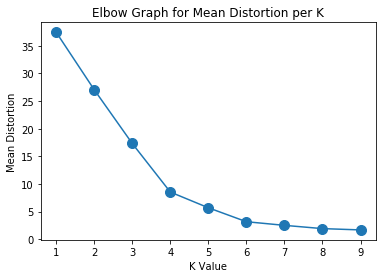

In [17]:
#Now determine the number of clusters based on the Kinks of the following plot
find_k(np.matrix(X), range(1,10),1)

The above plot shows normalized (by the number of instances=68) Euclidean distance = MeanDistortions Versus K-values (range{1:10). The Euclidean distance is between each instance and each centroid coordinates. 
The Elbows are at 4 and 6. The cluster number I choose is 4, closer to what I think is correct.

# PartIII. Classify the data points using the optimal K-value determined in Part II

# First scale the data 

In [18]:
#Standardization of a dataset is a common requirement for many machine learning estimators: 
#they might behave badly if the individual feature do not more or less look like standard 
#normally distributed data (e.g. Gaussian with 0 mean and unit variance).
# (Reference:http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html )


#Now feature scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then call the Kmeans classifier

In [19]:
#I chose 4 cluster centers based on the kinks on the graph shown above
kmeans_model = KMeans(n_clusters=4, max_iter = 1000, n_init= 100, random_state=42)
kmeans_model.fit(X_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

# Checking the centroids and labels

In [20]:
centers = kmeans_model.cluster_centers_

In [21]:
centers

array([[ 6.92254758,  0.218091  ,  0.77822371],
       [-0.44954556,  0.4564333 , -0.82034281],
       [ 0.03855005, -1.48120135, -0.19798423],
       [ 0.21947511,  0.46526079,  1.10257054]])

In [22]:
X.head()

,depth(km),mb_Neic,Ms_Neic
0,0,6.1,4.9
1,0,5.2,3.4
2,0,6.1,4.4
4,0,6.1,4.6
5,0,6.4,5.8


In [23]:
# I want to see a 2D plot
# First define the claster lables
labels = kmeans_model.labels_

In [24]:
# and labels are
labels

array([1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 0, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3])

In [25]:
#the size of the labels should be the number of instances
len(labels)

68

# Data frame with classification labels

In [26]:
# First: I just want double check the original X looks
X.head()

,depth(km),mb_Neic,Ms_Neic
0,0,6.1,4.9
1,0,5.2,3.4
2,0,6.1,4.4
4,0,6.1,4.6
5,0,6.4,5.8


In [27]:
#copy X into X2 so that I can have a new data frame with the labels as the last column
X2 = X
X2['labels'] = kmeans_model.labels_

In [28]:
#see how X2 looks
X2

,depth(km),mb_Neic,Ms_Neic,labels
0,0,6.1,4.9,1
1,0,5.2,3.4,2
2,0,6.1,4.4,1
4,0,6.1,4.6,1
5,0,6.4,5.8,3
8,0,6.1,4.6,1
9,0,5.8,4.3,1
10,0,5.9,4.3,1
11,0,5.9,4.7,1
13,0,6.2,4.6,1


# get the array format of the above data frame

In [29]:
#get X2's arry format to use for plotting
X2A = np.array(X2)

In [30]:
X2A

array([[   0. ,    6.1,    4.9,    1. ],
       [   0. ,    5.2,    3.4,    2. ],
       [   0. ,    6.1,    4.4,    1. ],
       [   0. ,    6.1,    4.6,    1. ],
       [   0. ,    6.4,    5.8,    3. ],
       [   0. ,    6.1,    4.6,    1. ],
       [   0. ,    5.8,    4.3,    1. ],
       [   0. ,    5.9,    4.3,    1. ],
       [   0. ,    5.9,    4.7,    1. ],
       [   0. ,    6.2,    4.6,    1. ],
       [   0. ,    5.9,    4.7,    1. ],
       [   0. ,    5.8,    4.6,    1. ],
       [   0. ,    6.1,    4.6,    1. ],
       [   0. ,    5.9,    4.4,    1. ],
       [   0. ,    5.9,    5. ,    1. ],
       [   0. ,    6. ,    4.4,    1. ],
       [   0. ,    6. ,    4.2,    1. ],
       [   0. ,    5.9,    4.3,    1. ],
       [   0. ,    6.2,    4.7,    1. ],
       [   0. ,    6. ,    4.3,    1. ],
       [   0. ,    6.2,    4.4,    1. ],
       [   0. ,    6.1,    4.2,    1. ],
       [   0. ,    5.9,    3.8,    1. ],
       [   0. ,    5.8,    3.4,    1. ],
       [   0. , 

In [31]:
#Number of rows of X2
len(X2A)

68

In [32]:
#checking the indexing
X2A[5][0:4]

array([ 0. ,  6.1,  4.6,  1. ])

In [33]:
X2A[5][3]

1.0

In [34]:
labels

array([1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 0, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3])

# Now plot the classified data color coded with the lables

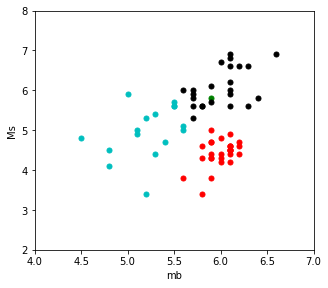

In [35]:
# green is for label 0, red is for label 1, cyan is for label 2 and black is for lable 3
colors = ["g.","r.","c.","k."]
plt.figure(figsize=(5.0, 4.4))
plt.xlabel('mb')
plt.ylabel('Ms')
for i in range(len(X2A)):
    plt.plot(X2A[i][1],X2A[i][2],colors[int(X2A[i][3])],markersize=10)
    plt.xlim(4,7)
    plt.ylim(2,8)
    #plt.figure(figsize=(4.6,5))
    # or
    # plt.plot(X2A[i][1],X2A[i][2],colors[labels[i]],markersize=10)
    # plot the centroids
    #cluster_center = kmeans_model.cluster_centers_[i]
    #cluster_center


##The above plot shows the four clussters. The red color are distinctly clusstered together. I kow that these are explossions. Therefore the Kmeans clusster analysis demonstrates its use in discriminating earthquakes from nuclear explosions.